In [1]:
import numpy as np
import pandas as pd
import glob
from scipy.stats import spearmanr
import os
%load_ext rpy2.ipython
import rpy2.robjects.lib.ggplot2 as ggplot2

# Load Lexical Information

In [2]:
ss = pd.read_csv('/shared_ssd/ss/10-17-17_GoogleUnigram/GoogleBooks2012/eng-all/01_sublexicalSurprisal/25000_sublex.csv')

In [3]:
ss.columns

Index(['word', 'ipa', 'ipa_ss_array', 'ipa_ss', 'ipa_n', 'ortho',
       'ortho_ss_array', 'ortho_ss', 'ortho_n', 'character',
       'character_ss_array', 'character_ss', 'character_n'],
      dtype='object')

# Load Model Files

In [4]:
eval_files = glob.glob('/shared_hd1/string-transducer/test07/**/evaluation.csv')
eval_files

['/shared_hd1/string-transducer/test07/smoothing0.0_insertion7_deletion0.8/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.001_insertion9_deletion0.4/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.001_insertion8_deletion0.5/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.0001_insertion7_deletion1.0/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.001_insertion9_deletion0.5/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.01_insertion1_deletion3/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.0_insertion8_deletion0.4/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.0_insertion8_deletion0.6/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.0_insertion7_deletion0.6/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.001_insertion8_deletion0.8/evaluation.csv',
 '/shared_hd1/string-transducer/test07/smoothing0.001_insertion9_delet

In [5]:
test = pd.read_csv('/shared_hd1/string-transducer/test07/smoothing0.01_insertion1_deletion3/evaluation.csv').merge(ss)

In [6]:
test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'word', 'mean_surprisal_weighted',
       'mean_surprisal_unweighted', 'frequency', 'numContexts',
       'retrievalTime', 'cmu', 'flat', 'cmu_list', 'arpa', 'probability',
       'unigramSurprisal2', 'likelihood', 'posteriors', 'denominators',
       'numerators', 'joint_competitor_probability', 'normalize',
       'likelihoodRatio', 'likDenom2', 'prior_odds', 'ipa', 'ipa_ss_array',
       'ipa_ss', 'ipa_n', 'ortho', 'ortho_ss_array', 'ortho_ss', 'ortho_n',
       'character', 'character_ss_array', 'character_ss', 'character_n'],
      dtype='object')

In [7]:
test.tail(5)['joint_competitor_probability']

9990    0.000025
9991    0.000304
9992    0.000170
9993    0.000523
9994    0.000078
Name: joint_competitor_probability, dtype: float64

In [8]:
def compute_spearman(path, ss):
    test = pd.read_csv(path).merge(ss)
    if 'joint_competitor_probability' in test.columns:
        print(path)
        pd_pwd_rho, pd_pwd_p = spearmanr(test['probability'], -1 * np.log(test['joint_competitor_probability']))        
        pd_pwd_nonzero = np.sum(np.logical_and(test['probability'] > 0, test['joint_competitor_probability'] > 0))

        pd_pic_rho, pd_pic_p = spearmanr(test['ipa_ss'], -1 * np.log(test['joint_competitor_probability']))   
        pd_pic_nonzero = np.sum(np.logical_and(test['ipa_ss'] > 0, test['joint_competitor_probability'] > 0))

        # pull out the model parameters from the filename
        three_vals = os.path.dirname(path).split('/')[-1].split('_')
        smoothing  = float(three_vals[0].replace('smoothing',''))
        insertion  = float(three_vals[1].replace('insertion',''))
        deletion  = float(three_vals[2].replace('deletion',''))
        posteriors = np.mean(-1 * np.log(test['posteriors']))

        return(pd.DataFrame({
            'posterior': posteriors,
            'pd_pwd_rho':[pd_pwd_rho],
            'pd_pwd_p':[pd_pwd_p],
            'pd_pwd_nonzero': [pd_pwd_nonzero],
            'pd_pic_rho': [pd_pic_rho],
            'pd_pic_nonzero': [pd_pic_nonzero],
            'pd_pic_p': [pd_pic_p],        
            'smoothing': [smoothing],
            'insertion': [insertion],
            'deletion':[deletion],
            'file': [path],
            'n': test.shape[0]}))
    else:
        return(None)
    
    

In [9]:
results = pd.concat([x for x  in [compute_spearman(x, ss) for x in eval_files] if x is not None])

/shared_hd1/string-transducer/test07/smoothing0.01_insertion1_deletion3/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.0_insertion5_deletion1/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.0_insertion5_deletion5/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.01_insertion5_deletion3/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.0_insertion3_deletion5/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.01_insertion5_deletion5/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.01_insertion3_deletion1/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.0_insertion1_deletion5/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.0_insertion1_deletion3/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.0_insertion5_deletion3/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.01_insertion7_deletion5/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.01_insertion3_deletion5/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.01_insertion7_deletion1/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.01_insertion5_deletion1/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.0_insertion1_deletion1/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.0_insertion7_deletion1/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.01_insertion1_deletion1/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.01_insertion7_deletion3/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.0_insertion3_deletion1/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.0_insertion3_deletion3/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.01_insertion3_deletion3/evaluation.csv
/shared_hd1/string-transducer/test07/smoothing0.0_insertion7_deletion5/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.0_insertion7_deletion3/evaluation.csv


/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/shared_hd1/string-transducer/test07/smoothing0.01_insertion1_deletion5/evaluation.csv


In [10]:
results.sort_values(by='pd_pic_rho', ascending=False).head(5)

,posterior,pd_pwd_rho,pd_pwd_p,pd_pwd_nonzero,pd_pic_rho,pd_pic_nonzero,pd_pic_p,smoothing,insertion,deletion,file,n
0,0.336359,-0.265797,3.085377e-161,9993,0.841711,9993,0.0,0.01,7.0,1.0,/shared_hd1/string-transducer/test07/smoothing...,9995
0,0.345571,-0.278776,8.000808e-178,9993,0.840663,9993,0.0,0.01,7.0,3.0,/shared_hd1/string-transducer/test07/smoothing...,9995
0,0.357621,-0.285608,6.329257e-187,9993,0.839404,9993,0.0,0.01,7.0,5.0,/shared_hd1/string-transducer/test07/smoothing...,9995
0,0.417401,-0.274547,2.560032e-172,9994,0.838691,9994,0.0,0.01,5.0,3.0,/shared_hd1/string-transducer/test07/smoothing...,9995
0,0.432196,-0.281083,7.203977e-181,9994,0.838572,9994,0.0,0.01,5.0,5.0,/shared_hd1/string-transducer/test07/smoothing...,9995


In [24]:
best_model_path = results.sort_values(by='pd_pic_rho', ascending=False).head(1)['file'][0]
best_model_path

'/shared_hd1/string-transducer/test07/smoothing0.01_insertion7_deletion1/evaluation.csv'

In [12]:
results.sort_values(by='posterior', ascending=True).head(1)['file'][0]

'/shared_hd1/string-transducer/test07/smoothing0.0_insertion7_deletion1/evaluation.csv'

In [13]:
results.sort_values(by='posterior', ascending=True).head(5)

,posterior,pd_pwd_rho,pd_pwd_p,pd_pwd_nonzero,pd_pic_rho,pd_pic_nonzero,pd_pic_p,smoothing,insertion,deletion,file,n
0,0.296924,-0.276111,2.418541e-174,9992,0.821925,9992,0.0,0.00,7.0,1.0,/shared_hd1/string-transducer/test07/smoothing...,9995
0,0.306206,-0.292491,2.336624e-196,9993,0.821479,9993,0.0,0.00,7.0,3.0,/shared_hd1/string-transducer/test07/smoothing...,9995
0,0.318162,-0.300408,1.547932e-207,9993,0.820822,9993,0.0,0.00,7.0,5.0,/shared_hd1/string-transducer/test07/smoothing...,9995
0,0.336359,-0.265797,3.085377e-161,9993,0.841711,9993,0.0,0.01,7.0,1.0,/shared_hd1/string-transducer/test07/smoothing...,9995
0,0.345571,-0.278776,8.000808e-178,9993,0.840663,9993,0.0,0.01,7.0,3.0,/shared_hd1/string-transducer/test07/smoothing...,9995


In [14]:
%R -i results

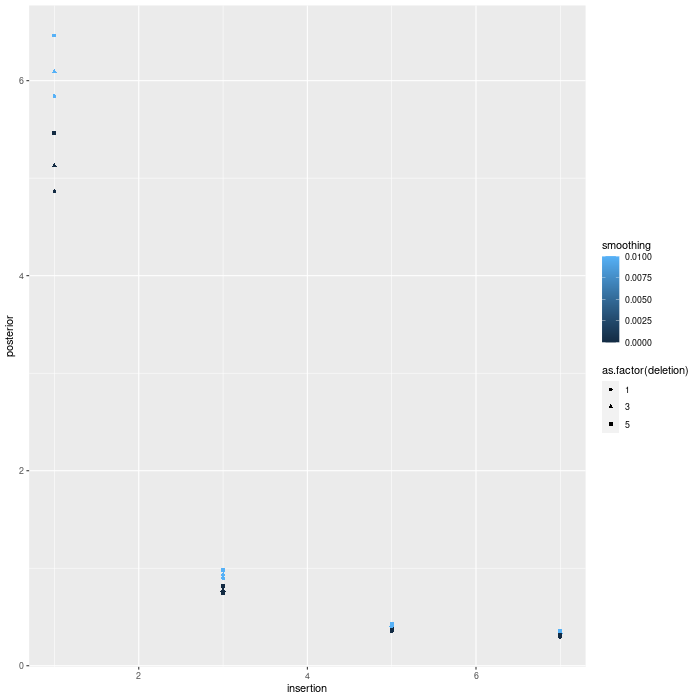

In [15]:
%%R -h 700 -w 700
ggplot(results) + geom_point(aes(x=insertion, y=posterior, color=smoothing, shape=as.factor(deletion)))

In [16]:
# insertion cost has a high effect on performance -- need a high insertion cost in order to predict the results
# smoothing is worse than the unsmoothed estimate
# deletion makes for a very small influcence

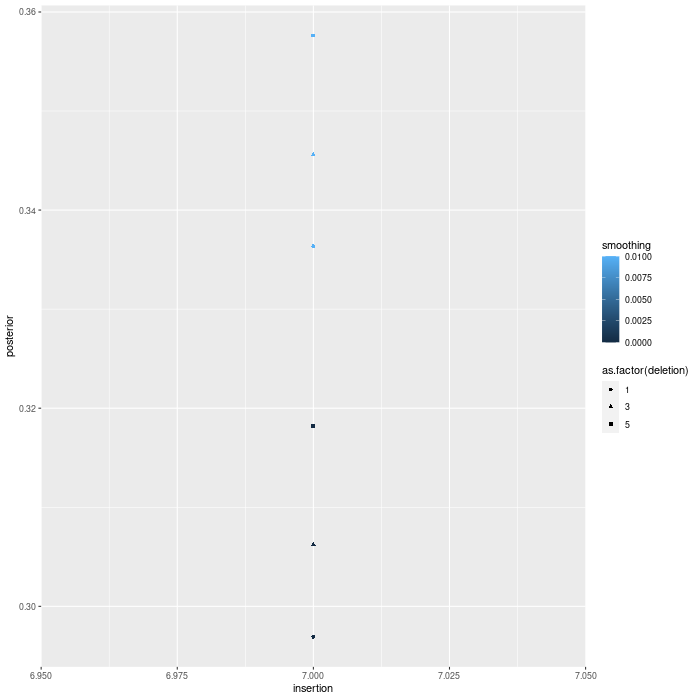

In [17]:
%%R -h 700 -w 700
ggplot(subset(results, insertion > 6)) + geom_point(aes(x=insertion, y=posterior, color=smoothing, shape=as.factor(deletion)))

In [18]:
# try smaller smoothing: .001, .0001, .0001
# try smaller deletion scaling: .1 - 1 by .1
# try limiting the insertion scaling by 7, 7.5, 8

np.exp(-1 *0.285557 )

To get the relative ranking of this hypothesized word with respect to others need to do it from the evaluation step rather than the scores step. Do I need to do this?  
[X] make sure that the probabilitiy is in fact the PIC -- it is.  
[X] look next at whether the high scores are non-trivial  
[X]  still need to load in something that has the PIC  

In [ ]:
# start the re-write -- Word forms reflect trade-offs between speaker effort and robust listener recognition

# Graph Best Model

In [97]:
best = pd.read_csv(best_model_path).merge(ss)
best_short = best[['joint_competitor_probability', 'word','ipa_ss','ipa_n']]
best_short['joint_competitor_probability_bits'] = -1 * np.log2(best_short['joint_competitor_probability'])

%R -i best_short

/home/stephan/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-97-6de61ea07dbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_short['joint_competitor_probability_bits'] = -1 * np.log2(best_short['joint_competitor_probability'])


In [108]:
%%R

spearboot = function(dat, var1, var2, cor_method, R = 2500){
    N <- nrow(dat)
    cor.boot = mat.or.vec(1,R)
    for (i in 1:R) {
      idx <- sample.int(N, N, replace = TRUE) 
      cor.boot[i] <- cor(dat[idx,var1],dat[idx,var2], method=cor_method,
                        use='pairwise.complete.obs')
    }
    return(cor.boot)
}

spear_eqn = function(df, var1, var2 ){
    cor_test = cor.test(df[[var1]], df[[var2]], use='pairwise.complete.obs',
       method = "spearman")
    
    boot_estimate = spearboot(df, var1, var2,
    'spearman')    
    boot_ci = quantile(boot_estimate, c(.025,.975))  
    
    cor = unname(cor_test$estimate)[1]
    corlow = boot_ci[['2.5%']][1]
    corhigh = boot_ci[['97.5%']][1]
    
    eq <- substitute("Spearman's"~rho~"="~a*" 95"*symbol("\045")~"CI"~"=["*b*","~c*"]", 
         list(a = format(cor, digits = 3),
              b = format(corlow, digits = 3),
             c = format(corhigh, digits = 3)
           ))
    return(as.character(as.expression(eq)))
}

R[write to console]: Saving 6.67 x 6.67 in image



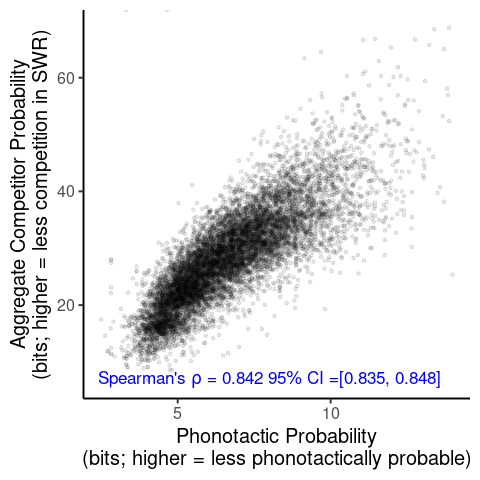

In [110]:
%%R
p1 = ggplot(subset(best_short, ipa_ss < 14)) + geom_point(aes(x=ipa_ss, y=joint_competitor_probability_bits), alpha = .1) + theme_classic(
base_size=20) + ylab("Aggregate Competitor Probability\n(bits; higher = less competition in SWR)") + xlab(
    "Phonotactic Probability\n(bits; higher = less phonotactically probable)") + annotate(
    "text", x = 8, y = 7, label = spear_eqn(best_short, 'joint_competitor_probability_bits','ipa_ss'), parse = TRUE,
    size = 6, color = 'blue')

ggsave('figures/pd_vs_phonotactic_probability.pdf')
print(p1)

# Compare with PLD and OLD

In [111]:
pld = pd.read_table('/shared_hd0/datasets/Yarkoni_PLD/pld20.txt', header = None)
pld.columns = ['word', 'pld20']
old = pd.read_table('/shared_hd0/datasets/Yarkoni_PLD/old20.txt', header = None)
old.columns = ['word', 'old20']
old.head(5)

,word,old20
0,stabs,1.70
1,shirt,1.70
2,alike,1.85
3,outsell,2.80
4,archer,1.80


In [112]:
best_w_nd = best.merge(old).merge(pld)
best_w_nd.shape

(9770, 37)

In [113]:
best_w_nd.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'word', 'mean_surprisal_weighted',
       'mean_surprisal_unweighted', 'frequency', 'numContexts',
       'retrievalTime', 'cmu', 'flat', 'cmu_list', 'arpa', 'probability',
       'unigramSurprisal2', 'likelihood', 'posteriors', 'denominators',
       'numerators', 'joint_competitor_probability', 'normalize',
       'likelihoodRatio', 'likDenom2', 'prior_odds', 'ipa', 'ipa_ss_array',
       'ipa_ss', 'ipa_n', 'ortho', 'ortho_ss_array', 'ortho_ss', 'ortho_n',
       'character', 'character_ss_array', 'character_ss', 'character_n',
       'old20', 'pld20'],
      dtype='object')

In [114]:
best_w_nd_short  = best_w_nd[['word','pld20','old20','joint_competitor_probability','ipa_ss','ipa_n','probability']]
best_w_nd_short['joint_competitor_probability_bits'] = -1 * np.log2(best_w_nd_short['joint_competitor_probability'])
%R -i best_w_nd_short

<ipython-input-114-a357cd3a8791>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_w_nd_short['joint_competitor_probability_bits'] = -1 * np.log2(best_w_nd_short['joint_competitor_probability'])


In [115]:
%%R
head(best_w_nd_short)

  word pld20 old20 joint_competitor_probability   ipa_ss ipa_n probability
0  the  1.80  1.50                 5.416324e-05 6.157804     3  0.08469824
1   of  1.65  1.45                 1.440874e-04 4.905201     3  0.06009250
2   to  1.00  1.15                 6.095184e-04 4.040986     3  0.03587160
3  and  1.00  1.25                 7.106596e-06 3.406582     4  0.02619940
4   in  1.00  1.00                 2.610166e-04 2.709327     3  0.02547484
5 that  1.25  1.65                 1.702700e-05 7.303527     4  0.01289469
  joint_competitor_probability_bits
0                          14.17233
1                          12.76077
2                          10.68004
3                          17.10241
4                          11.90357
5                          15.84182


R[write to console]: Saving 6.67 x 6.67 in image



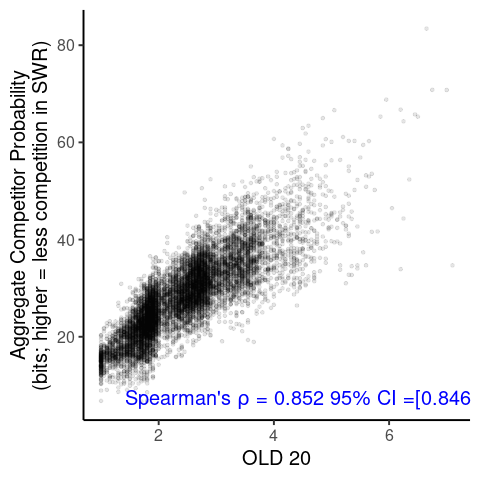

In [116]:
%%R
p1 = ggplot(subset(best_w_nd_short)) + geom_point(aes(x=old20, y= joint_competitor_probability_bits), alpha = .1) + theme_classic(
base_size=20) + ylab("Aggregate Competitor Probability\n(bits; higher = less competition in SWR)") + xlab(
    "OLD 20") + annotate(
    "text", x = 5, y = 7, label = spear_eqn(best_w_nd_short, 'joint_competitor_probability_bits','old20'), parse = TRUE,
    size = 7, color = 'blue')

ggsave('figures/pd_vs_old20.pdf')
print(p1)

R[write to console]: Saving 6.67 x 6.67 in image



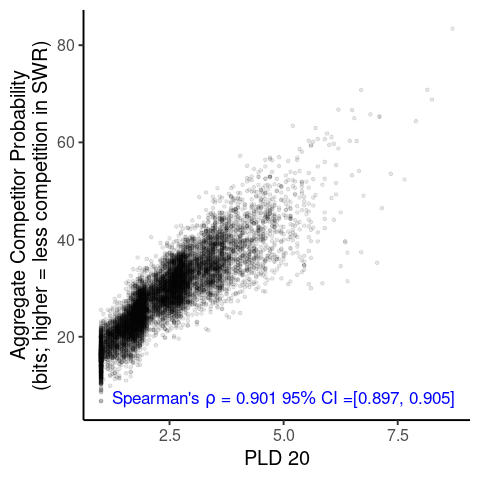

In [117]:
%%R
p1 = ggplot(subset(best_w_nd_short)) + geom_point(aes(x=pld20, y= joint_competitor_probability_bits), alpha = .1) + theme_classic(
base_size=20) + ylab("Aggregate Competitor Probability\n(bits; higher = less competition in SWR)") + xlab(
    "PLD 20") + annotate(
    "text", x = 5, y = 7, label = spear_eqn(best_w_nd_short, 'joint_competitor_probability_bits','pld20'), parse = TRUE,
    size = 6, color = 'blue')

ggsave('figures/pd_vs_pld20.pdf')
print(p1)

### Frequency vs. PLD

R[write to console]: Saving 6.67 x 6.67 in image



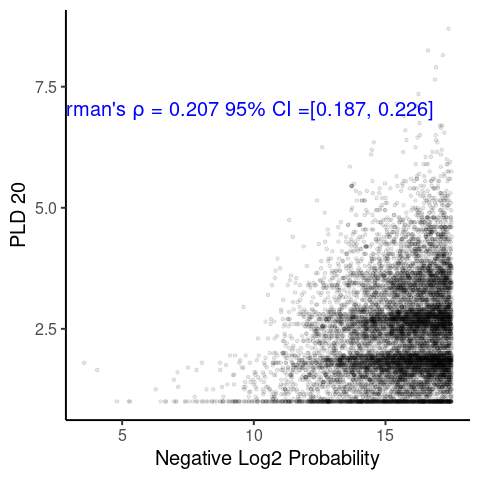

In [118]:
%%R
best_w_nd_short$probability_bits  = -1 * log(best_w_nd_short$probability, base = 2)
p1 = ggplot(subset(best_w_nd_short)) + geom_point(aes(x=probability_bits, y= pld20), alpha = .1) + theme_classic(
base_size=20) + xlab("Negative Log2 Probability") + ylab(
    "PLD 20") + annotate(
    "text", x = 9, y = 7, label = spear_eqn(best_w_nd_short, 'probability_bits','pld20'), parse = TRUE,
    size = 7, color = 'blue')

ggsave('figures/probability_vs_pld20.pdf')
print(p1)

R[write to console]: Saving 6.67 x 6.67 in image



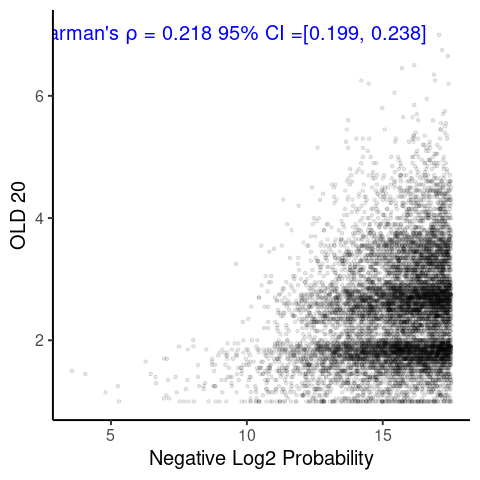

In [119]:
%%R
p1 = ggplot(subset(best_w_nd_short)) + geom_point(aes(x=probability_bits, y= old20), alpha = .1) + theme_classic(
base_size=20) + xlab("Negative Log2 Probability") + ylab(
    "OLD 20") + annotate(
    "text", x = 9, y = 7, label = spear_eqn(best_w_nd_short, 'probability_bits','old20'), parse = TRUE,
    size = 7, color = 'blue')

ggsave('figures/probability_vs_old20.pdf')
print(p1)

In [120]:
# So then do we expect P(w) to predict P(d)

In [121]:
%%R
head(best_w_nd_short)

  word pld20 old20 joint_competitor_probability   ipa_ss ipa_n probability
0  the  1.80  1.50                 5.416324e-05 6.157804     3  0.08469824
1   of  1.65  1.45                 1.440874e-04 4.905201     3  0.06009250
2   to  1.00  1.15                 6.095184e-04 4.040986     3  0.03587160
3  and  1.00  1.25                 7.106596e-06 3.406582     4  0.02619940
4   in  1.00  1.00                 2.610166e-04 2.709327     3  0.02547484
5 that  1.25  1.65                 1.702700e-05 7.303527     4  0.01289469
  joint_competitor_probability_bits probability_bits
0                          14.17233         3.561524
1                          12.76077         4.056671
2                          10.68004         4.801014
3                          17.10241         5.254323
4                          11.90357         5.294783
5                          15.84182         6.277079


R[write to console]: Saving 6.67 x 6.67 in image



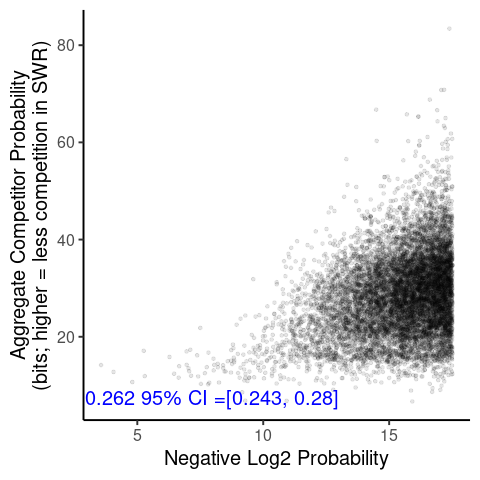

In [122]:
%%R

p1 = ggplot(best_w_nd_short) + geom_point(aes(x=probability_bits, y= joint_competitor_probability_bits), alpha = .1) + theme_classic(
base_size=20) + ylab("Aggregate Competitor Probability\n(bits; higher = less competition in SWR)") + xlab(
    "Negative Log2 Probability") + annotate(
    "text", x = 5, y = 7, label = spear_eqn(best_w_nd_short, 'probability_bits','joint_competitor_probability_bits'), parse = TRUE,
    size = 7, color = 'blue')

ggsave('figures/probability_vs_denominator_bits.pdf')
print(p1)

R[write to console]: Saving 6.67 x 6.67 in image



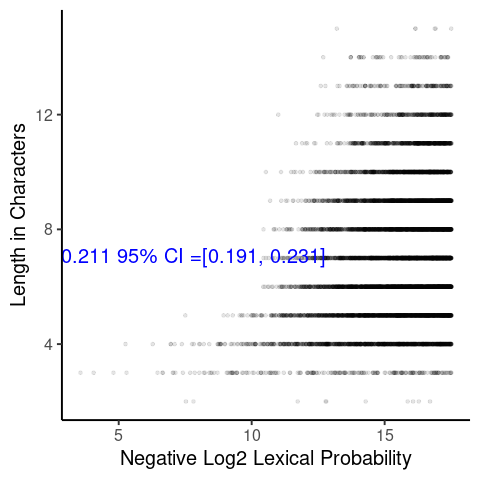

In [123]:
%%R
p1 = ggplot(best_w_nd_short) + geom_point(aes(x=probability_bits, y= ipa_n), alpha = .1) + theme_classic(
base_size=20) + ylab("Length in Characters") + xlab(
    "Negative Log2 Lexical Probability") + annotate(
    "text", x = 5, y = 7, label = spear_eqn(best_w_nd_short, 'probability_bits','ipa_n'), parse = TRUE,
    size = 7, color = 'blue')

ggsave('figures/probability_vs_word_length.pdf')
print(p1)

R[write to console]: Saving 6.67 x 6.67 in image



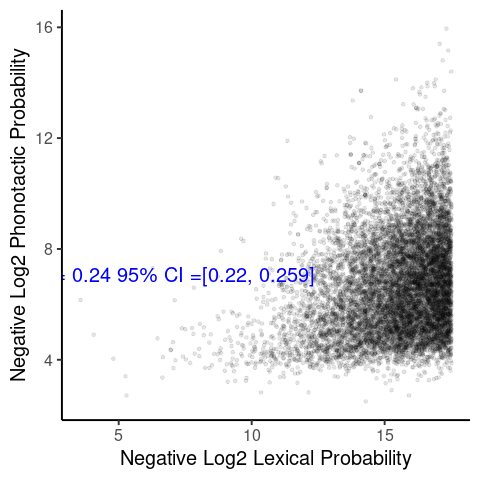

In [124]:
%%R
p1 = ggplot(best_w_nd_short) + geom_point(aes(x=probability_bits, y= ipa_ss), alpha = .1) + theme_classic(
base_size=20) + ylab("Negative Log2 Phonotactic Probability") + xlab(
    "Negative Log2 Lexical Probability") + annotate(
    "text", x = 5, y = 7, label = spear_eqn(best_w_nd_short, 'probability_bits','ipa_ss'), parse = TRUE,
    size = 7, color = 'blue')

ggsave('figures/probability_vs_phonotactic_probability.pdf')
print(p1)

- Very strong correlation between ACP and OLD20 and PLD20 (.85, .9)  
- Strong correlation between ACP and phonotactic probability (.84)  
- Moderate correlation between ACP and lexical probability (.26)  
- Weaker correlation between phonotactic probability and lexial probability (.24)  
- Weaker Zipfian baseline between word length and probability (.21)  

Include these four in the graph:
- ACP and phonotactic probability
- ACP and lexical probability
- phonotactic probability and lexical probability
- word length and probability

# Coltheart's N Neighborhood Density

In [125]:
clearpond_headers = pd.read_table('/shared_hd0/datasets/CLEARPOND/clearpondHeaders_EN.txt', header = None, encoding='latin-1')
clearpond_headers.head(5)

,0
0,Word
1,Phono
2,Length_Letters
3,Length_Phonomes
4,Frequency


In [126]:
clearpond = pd.read_table('/shared_hd0/datasets/CLEARPOND/englishCPdatabase2.txt', header = 0, encoding='latin-1')
clearpond.columns = clearpond_headers[0]

In [127]:
clearpond.head(5)

,Word,Phono,Length_Letters,Length_Phonomes,Frequency,eOTAN,eOTAF,eOTAW,eOTHN,eOTHF,...,sPDAW,sPDHN,sPDHF,sPDHW,sPAAN,sPAAF,sPAAW,sPAHN,sPAHF,sPAHW
0,I,aI,1,1,39971.1569,8,7775.5588,a;it;in;is;if;Hi;pi;Id,0,NaN,...,NaN,0,NaN,NaN,1,74.7837,gay,0,NaN,NaN
1,the,D.5,3,2,29449.1765,11,1713.8164,she;tie;thy;toe;tee;Tae;he;they;them;then;thee,0,NaN,...,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2,to,t.u,2,2,22677.8431,19,1206.6243,do;No;so;go;ho;Co;too;two;top;Tom;toy;toe;ton;...,0,NaN,...,u;uh,0,NaN,NaN,1,687.1394,tus,0,NaN,NaN
3,a,eI,1,1,20415.2745,13,3772.5173,I;at;as;an;am;Ah;ma;ha;la;Aw;Pa;ad;ax,1,39971.1569,...,NaN,0,NaN,NaN,2,97.9928,rey;ley,0,NaN,NaN
4,it,I.t,2,2,18896.3137,17,3918.8777,in;is;if;at;Id;I;sit;hit;bit;its;fit;kit;pit;l...,1,39971.1569,...,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [128]:
clearpond['word'] = [str(x).lower() for x in clearpond['Word']]

In [129]:
best.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'word', 'mean_surprisal_weighted',
       'mean_surprisal_unweighted', 'frequency', 'numContexts',
       'retrievalTime', 'cmu', 'flat', 'cmu_list', 'arpa', 'probability',
       'unigramSurprisal2', 'likelihood', 'posteriors', 'denominators',
       'numerators', 'joint_competitor_probability', 'normalize',
       'likelihoodRatio', 'likDenom2', 'prior_odds', 'ipa', 'ipa_ss_array',
       'ipa_ss', 'ipa_n', 'ortho', 'ortho_ss_array', 'ortho_ss', 'ortho_n',
       'character', 'character_ss_array', 'character_ss', 'character_n'],
      dtype='object')

In [130]:
best_w_cn = best.merge(clearpond[['word','ePTAN','eOTAN']])
best_w_cn_short = best_w_cn[['word','ePTAN','eOTAN','joint_competitor_probability','ipa_ss','ipa_n','probability']]
%R -i best_w_cn_short

R[write to console]: Saving 6.67 x 6.67 in image



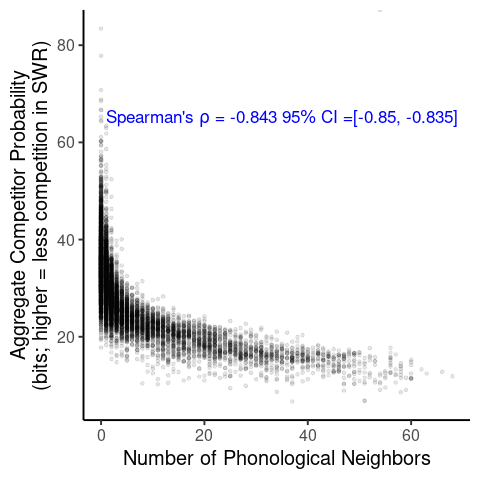

In [131]:
%%R
best_w_cn_short$probability_bits  = -1 * log(best_w_cn_short$probability, base =2)
best_w_cn_short$joint_competitor_probability_bits = -1 * log(best_w_cn_short$joint_competitor_probability, base =2)

p1 = ggplot(best_w_cn_short) + geom_point(aes(y=joint_competitor_probability_bits, x= ePTAN), alpha = .1) + theme_classic(
base_size=20) + xlab("Number of Phonological Neighbors") + ylab("Aggregate Competitor Probability\n(bits; higher = less competition in SWR)") + annotate(
    "text", x = 35, y = 65, label = spear_eqn(best_w_cn_short, 'joint_competitor_probability_bits','ePTAN'), parse = TRUE,
    size = 6, color = 'blue')

ggsave('figures/aggregateCompetitorProbability_vs_numPhonoNeighbors.pdf')
print(p1)

R[write to console]: Saving 6.67 x 6.67 in image



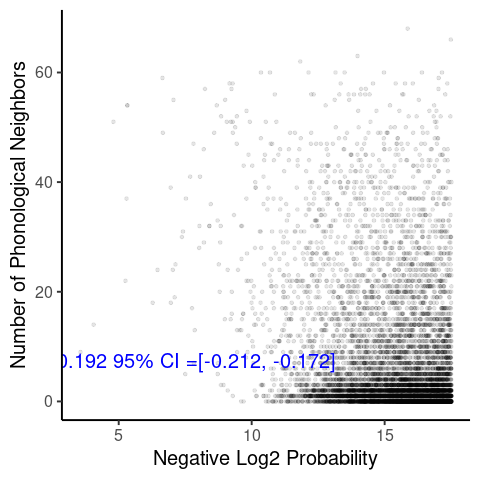

In [132]:
%%R

p1 = ggplot(best_w_cn_short) + geom_point(aes(x=probability_bits, y= ePTAN), alpha = .1) + theme_classic(
base_size=20) + ylab("Number of Phonological Neighbors") + xlab("Negative Log2 Probability") + annotate(
    "text", x = 5, y = 7, label = spear_eqn(best_w_cn_short, 'probability_bits','ePTAN'), parse = TRUE,
    size = 7, color = 'blue')

ggsave('figures/probability_vs_numPhonoNeighbors.pdf')
print(p1)

R[write to console]: Saving 6.67 x 6.67 in image



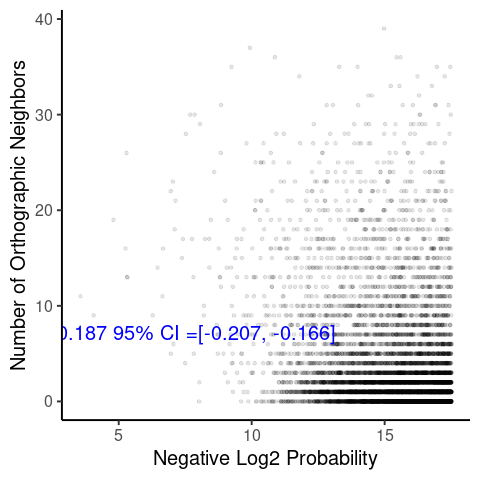

In [133]:
%%R
p1 = ggplot(best_w_cn_short) + geom_point(aes(x=probability_bits, y= eOTAN), alpha = .1) + theme_classic(
base_size=20) + ylab("Number of Orthographic Neighbors") + xlab("Negative Log2 Probability") + annotate(
    "text", x = 5, y = 7, label = spear_eqn(best_w_cn_short, 'probability_bits','eOTAN'), parse = TRUE,
    size = 7, color = 'blue')

ggsave('figures/probability_vs_numOrthoNeighbors.pdf')
print(p1)

In [134]:
# constancy in posterior probability by frequency?

In [135]:
best = pd.read_csv(best_model_path).merge(ss)
best.columns
best['frequency'] = best['frequency'].astype('float')
best_short = best[['posteriors', 'word','frequency']]
# best_short['joint_competitor_probability_bits'] = -1 * np.log2(best_short['joint_competitor_probability'])

%R -i best_short

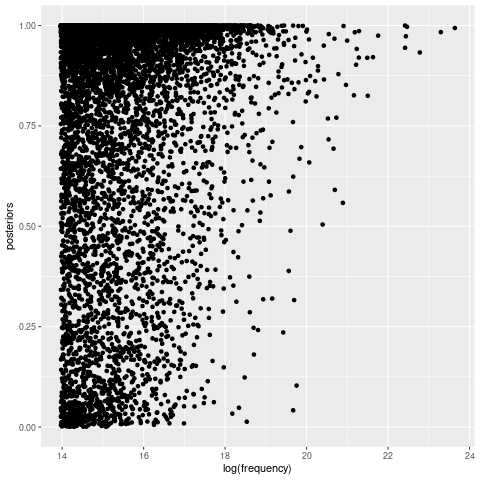

In [136]:
%%R
ggplot(best_short) + geom_point(aes(x=log(frequency), y=posteriors))

# Todos

In [137]:
#[X] best to search for the highest correlation using the correlation rather than trying to maximize the probability of the found words
#[X] re-run this to get joint_competitor_probability -- where I remove the the contribution of the target term, so that it is only all of the competitors.
#[X] figure out how to get the number of phonological neighbords into the the dataset
#[ ] add this figure to the paper 
#[ ] figure out how to package this for submission / code sharing -- it's in the wrong codebase
